In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np

In [2]:
dates = ["20230321", "20230322", "20230323", "20230327", "20230328", "20230329"]
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"

Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:00<00:00, 30.49it/s]

1679411544.0


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 27.39it/s]

1679496489.0


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


1679584240.0
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


1679907284.0
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 24.89it/s]


1680024570.0
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 25.69it/s]

1680110232.0


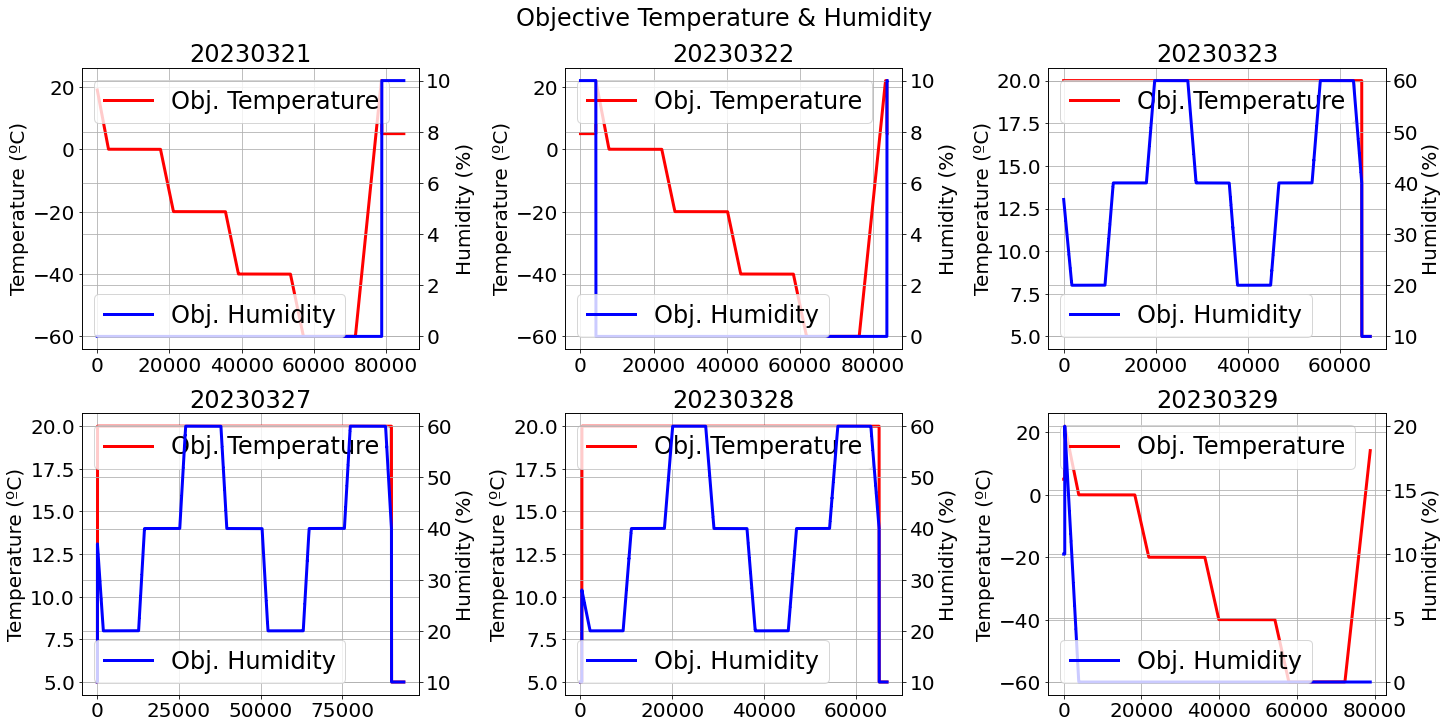

In [22]:
fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
fig.set_size_inches(20, 10)
fig.suptitle("Objective Temperature & Humidity")
cnt = 0
for date in dates:
    path_to_data = path + date + "/"
    hum = getters.get_raw_data(
        path_to_split=path_to_data,
        filetype="humidity",
        pol="Hum"
                               ).sort_values(by="Timestamp").reset_index(drop=True)
    t0 = hum["Timestamp"][0]
    print(t0)
    axes[cnt].plot(hum["Timestamp"]-t0, hum["ObRH"], color="red", label="Obj. Temperature")
    ax_twin = axes[cnt].twinx()
    ax_twin.plot(hum["Timestamp"]-t0, hum["ObT"], color="blue", label="Obj. Humidity")
    axes[cnt].legend(loc="upper left")
    ax_twin.legend(loc="lower left")
    axes[cnt].set_title(date)
    axes[cnt].set_ylabel("Temperature (ºC)")
    ax_twin.set_ylabel("Humidity (%)")
    
    cnt += 1

Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]


1679411544.0
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 56.11it/s]


1679496489.0
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 56.79it/s]


1679584240.0
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 43.34it/s]


1679907284.0
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 54.87it/s]


1680024570.0
Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 50.24it/s]


1680110232.0


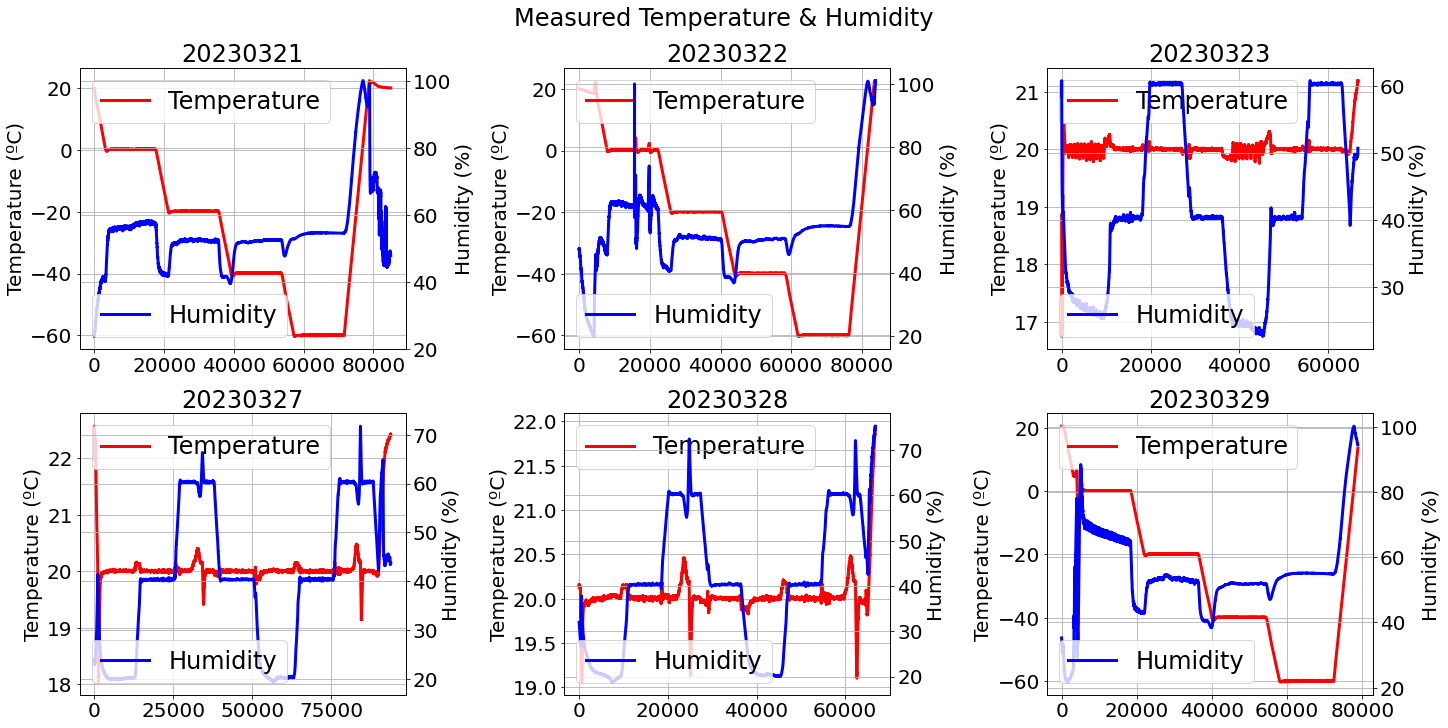

In [25]:
fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
fig.set_size_inches(20, 10)
fig.suptitle("Measured Temperature & Humidity")
cnt = 0
for date in dates:
    path_to_data = path + date + "/"
    hum = getters.get_raw_data(
        path_to_split=path_to_data,
        filetype="humidity",
        pol="Hum"
                               ).sort_values(by="Timestamp").reset_index(drop=True)
    t0 = hum["Timestamp"][0]
    print(t0)
    axes[cnt].plot(hum["Timestamp"]-t0, hum["T"], color="red", label="Temperature")
    ax_twin = axes[cnt].twinx()
    ax_twin.plot(hum["Timestamp"]-t0, hum["RH"], color="blue", label="Humidity")
    axes[cnt].legend(loc="upper left")
    ax_twin.legend(loc="lower left")
    axes[cnt].set_title(date)
    axes[cnt].set_ylabel("Temperature (ºC)")
    ax_twin.set_ylabel("Humidity (%)")
    
    cnt += 1

/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json
Keys to read: ['Av3', 'Av4']


Reading spectrums key: Av: 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]


Keys to read: ['Temp1', 'Temp2']


Reading temperature key: Temp: 100%|██████████| 2/2 [00:00<00:00, 48.69it/s]


Keys to read: ['Av1', 'Av2', 'Av3', 'Av4']


Reading spectrums key: Av: 100%|██████████| 4/4 [00:10<00:00,  2.71s/it]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 28.01it/s]


OSError: Unable to open file (unable to open file: name = '/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/20230329/spectrums.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

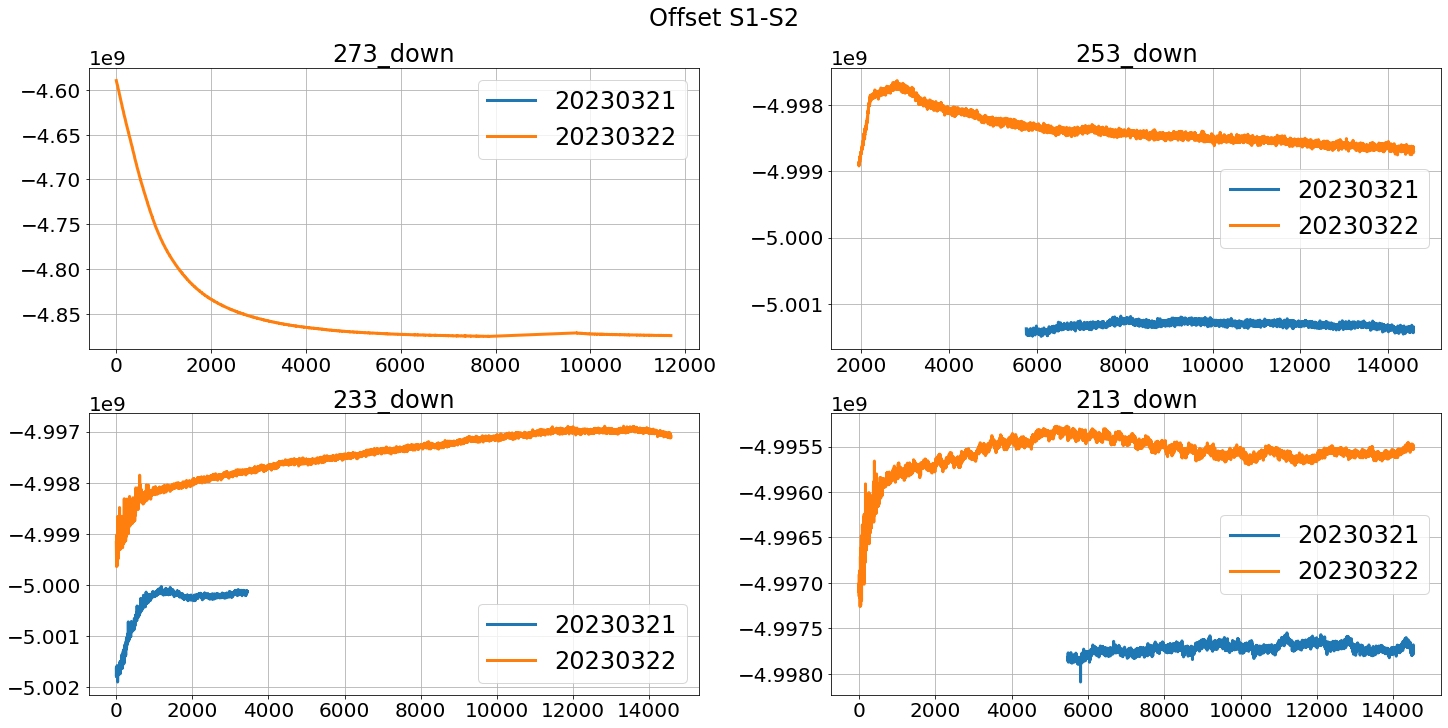

In [25]:
dates = ["20230321", "20230322"]
plateaus = getters.get_plateaus()
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches(20, 10)
fig.suptitle("Offset S1-S2")
for date in dates:
    path_to_data = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/" +date+ "/"
    plat = plateaus[date]
    data = getters.get_raw_data(path_to_split=path_to_data, filetype="spectrums", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    temp = getters.get_raw_data(path_to_split=path_to_data, filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    cnt = 0
    for plateau in plat:
        t0 = plat[plateau][0]
        tf = plat[plateau][1]
        dcut = data.loc[(data["Timestamp"]>t0)&(data["Timestamp"]<tf)]
        tcut = temp.loc[(temp["Timestamp"]>t0)&(temp["Timestamp"]<tf)]
        axes[cnt].plot(dcut["Timestamp"]-t0, (dcut["Wav1-1"] - dcut["Wav1-2"])*1e9, label=date)
        axes[cnt].plot(tcut["Timestamp"]-t0, (tcut["Wav1-1"] - tcut["Wav1-2"])*1e9, label=date)
        axes[cnt].set_title(plateau)
        axes[cnt].legend()
        cnt += 1